In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/MACHINELEARNING/PRAKTIKUM/PRAKTIKUM4/DATA/'

In [ ]:
df = pd.read_csv(path + "calonpembelimobil.csv")
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df['Status'].unique())

[1 2 3 0]


In [ ]:
print(df['Kelamin'].unique())

[0 1]


In [ ]:
print("Distribusi Status: \n", df['Status'].value_counts())
print("\nDistribusi Kelamin: \n", df['Kelamin'].value_counts())

Distribusi Status: 
 Status
2    287
1    262
0    240
3    211
Name: count, dtype: int64

Distribusi Kelamin: 
 Kelamin
0    519
1    481
Name: count, dtype: int64


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


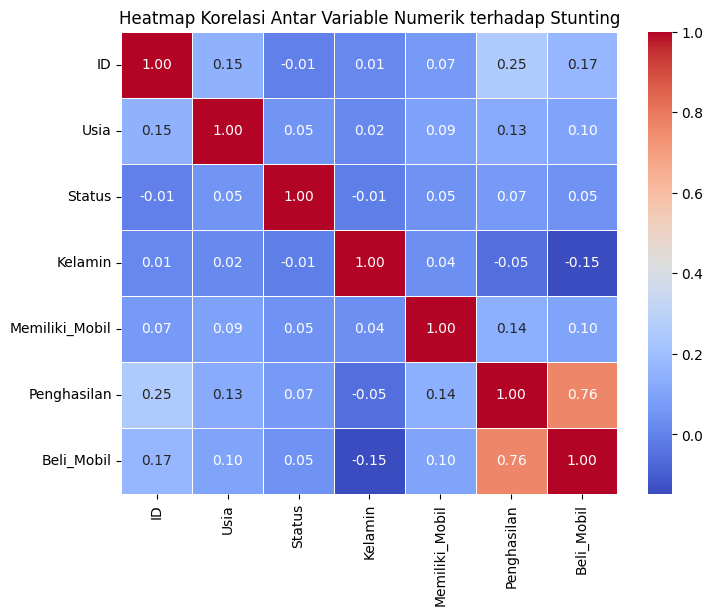

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variable Numerik terhadap Stunting", fontsize=12)
plt.show()

In [ ]:
feature_cols = ['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']
target_col = 'Beli_Mobil'

X = df[feature_cols]
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 5)
y shape: (1000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("data latih:", X_train.shape)
print("data uji:", X_test.shape)

data latih: (800, 5)
data uji: (200, 5)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

feature_num = ['Usia', 'Penghasilan']
feature_bin = ['Status', 'Kelamin', 'Memiliki_Mobil']


preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

clf.fit(X_train, y_train)
print("✅ Model Logistic Regression berhasil dilatih.")

✅ Model Logistic Regression berhasil dilatih.


In [ ]:
# Prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Hitung metrik
print(f"Akurasi    : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision  : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall     : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score   : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi    : 0.9300
Precision  : 0.9829
Recall     : 0.9055
F1-Score   : 0.9426
ROC-AUC    : 0.9769


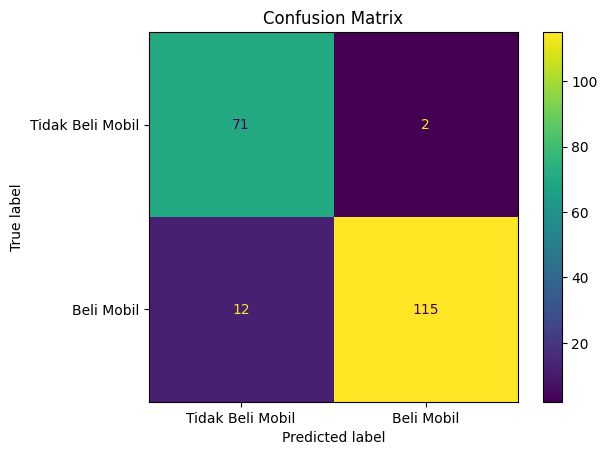

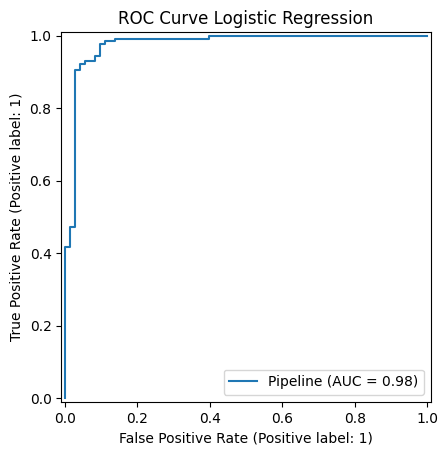

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli Mobil', 'Beli Mobil']).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve Logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Beli Mobil', 'Beli Mobil']))

                  precision    recall  f1-score   support

Tidak Beli Mobil       0.86      0.97      0.91        73
      Beli Mobil       0.98      0.91      0.94       127

        accuracy                           0.93       200
       macro avg       0.92      0.94      0.93       200
    weighted avg       0.94      0.93      0.93       200



In [ ]:
from sklearn.model_selection import cross_val_score

# Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, X, y, cv=5)

# Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.775 0.915 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.9059999999999999
Standar deviasi: 0.06681317235396023


In [ ]:
# Ambil nama fitur & koefisien
feat_names = feature_num + feature_bin
coeffs = clf.named_steps['model'].coef_[0]
odds = np.exp(coeffs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coeffs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
1,Penghasilan,4.550296,94.660404
4,Memiliki_Mobil,0.094958,1.099613
0,Usia,-0.046660,0.954412
2,Status,-0.124292,0.883122
3,Kelamin,-1.130837,0.322763


In [ ]:
data_baru = pd.DataFrame({
    'Usia': [30, 26 ],
    'Status': [2, 1],
    'Kelamin': [1, 0],
    'Memiliki_Mobil': [1, 1],
    'Penghasilan': [150000, 65000]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Probability'] = prob
hasil['Prediksi'] = pred

display(hasil)

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Probability,Prediksi
0,30,2,1,1,150000,1.0,1
1,26,1,0,1,65000,1.0,1
